In [1]:
from datasets import load_dataset

ds = load_dataset("Adelante/Al-Ahram-raw")

C:\Users\黄柏喻\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Generating train split:   0%|          | 0/10852 [00:00<?, ? examples/s]

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'text'],
        num_rows: 10852
    })
})

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Windows系统的默认字体
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 假设你的数据集是一个包含文本列的 DataFrame

data = pd.DataFrame(ds['train'])


# 计算每段文本的长度
data['text_length'] = data['text'].apply(len)

# 计算文本长度大于 10000 的占比
threshold = 10000
percentage_above_threshold = (data['text_length'] > threshold).mean() * 100


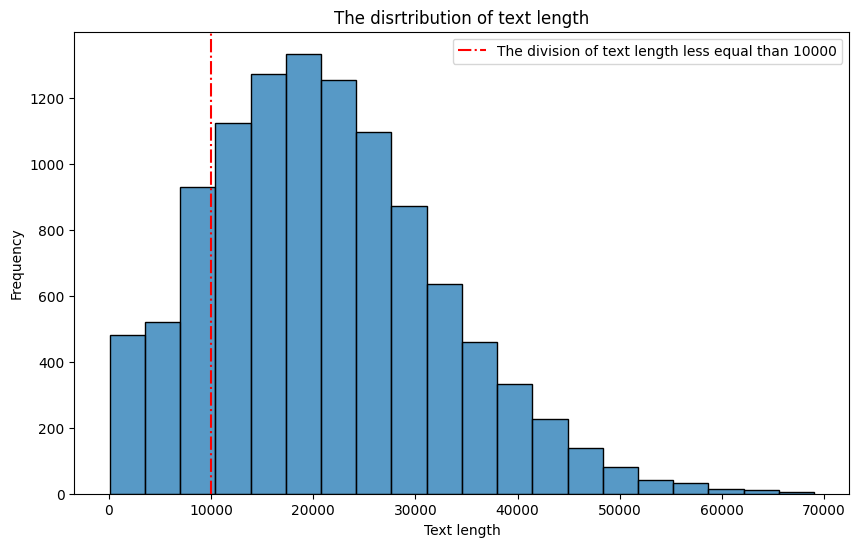

In [10]:
# 使用 seaborn 绘制文本长度的直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=False, bins=20)

# 添加标记阈值的垂直线
plt.axvline(threshold, color='red', linestyle='-.', label=f'The division of text length less equal than {threshold}')

# 在图中显示占比信息
#plt.text(threshold + 500, plt.gca().get_ylim()[1] * 0.8,
#         f'Above {threshold}: {percentage_above_threshold:.2f}%', color='red')

# 添加标题和标签
plt.title('The disrtribution of text length')
plt.xlabel('Text length')
plt.ylabel('Frequency', rotation=90)

plt.legend()

plt.show()

---

# Vis For Ablation 

In [95]:
from datasets import load_dataset

ds = load_dataset("Adelante/sentiment_analysis_v1")


In [96]:
ds

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'slice', 'text', 'containing', 'sentiment_label_numerical', 'sentiment_label'],
        num_rows: 28240
    })
})

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data = pd.DataFrame({
    "label":ds['train']['sentiment_label']
})

data


,label
0,相对满意
1,相对满意
2,相对不满
3,相对满意
4,相对不满
...,...
28235,相对不满
28236,相对不满
28237,相对不满
28238,相对不满


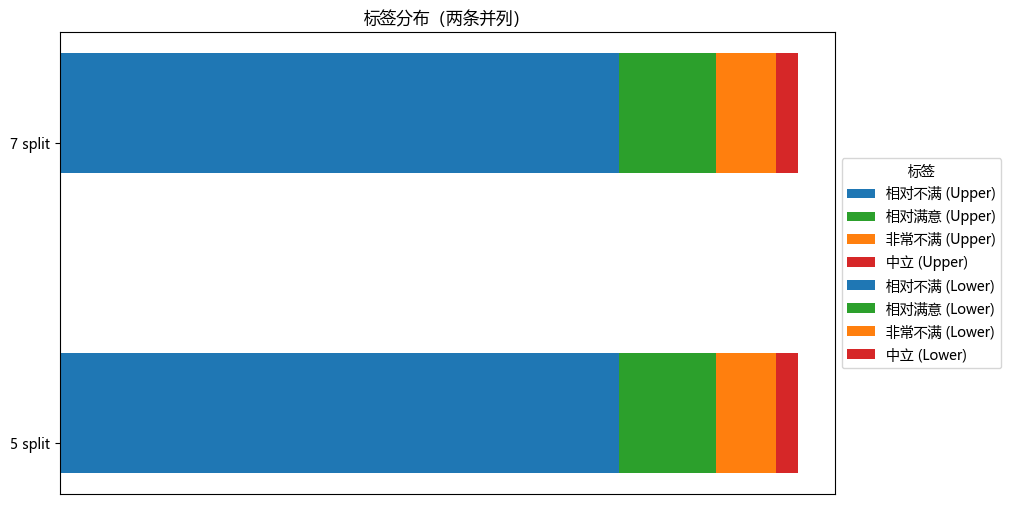

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# 计算每个标签的数量
label_counts = data.value_counts()

# 设置图形的默认字体（假设你想用系统默认的中文字体）
plt.rcParams['font.family'] = 'Microsoft YaHei'  # Windows系统的默认字体是'Microsoft YaHei'

# 手动定义颜色列表，每个颜色对应一个标签
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # 示例颜色，顺序对应标签 A, B, C, D

# 标签及对应数量
labels = [str(index[0]) for index in label_counts.index]  # 所有标签
values = label_counts.values  # 对应数量

# 创建堆叠柱状图
plt.figure(figsize=(10, 6))

# 设置柱子的宽度
bar_width = 0.2  # 设置柱形宽度

# 初始化位置数组，每个标签的x轴位置
x = np.arange(2)  # 每个标签的位置

# 设置并排柱状图的偏移量
offset = np.array([0, bar_width ])  # 只绘制两组，并列

# 初始化底部位置
bottom = np.zeros(2)

# 绘制第一组堆叠柱状图（左边的那一组）
for i, (label, value, color) in enumerate(zip(labels, values, colors)):
    bars = plt.barh(x + offset[0], value, label=f'{label} (Upper)', color=color, height=bar_width, left=bottom)  # 左边的堆叠柱状图
    bottom += value  # 更新堆叠的底部位置



In [15]:
[str(index[0]) for index in label_counts.index]

['相对不满', '相对满意', '非常不满', '中立', '非常满意']

In [98]:
from datasets import load_dataset

ds2 = load_dataset("Adelante/arabic-qa-largebatch")

In [99]:
ds2

DatasetDict({
    train: Dataset({
        features: ['year', 'month', 'date', 'page', 'slice', 'text', 'containing', '问题1-数字', '问题2-数字', '问题3-数字', '问题4-数字', '问题5-数字', '问题6-数字', '问题7-数字', '问题8-数字', '问题9-数字', '问题1-文字', '问题2-文字', '问题3-文字', '问题4-文字', '问题5-文字', '问题6-文字', '问题7-文字', '问题8-文字', '问题9-文字'],
        num_rows: 28240
    })
})

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data2 = pd.DataFrame({
    "label":ds2['train']['问题1-文字']
})

# 排除掉标签为'E'的数据
data_filtered = data2[data2['label'] != 0]

# 计算每个标签的数量（过滤后的数据）
label_counts2 = data_filtered['label'].value_counts()

# 计算每个标签的数量
label_counts2 = data2.value_counts()
label_counts2 = label_counts2[:-2]

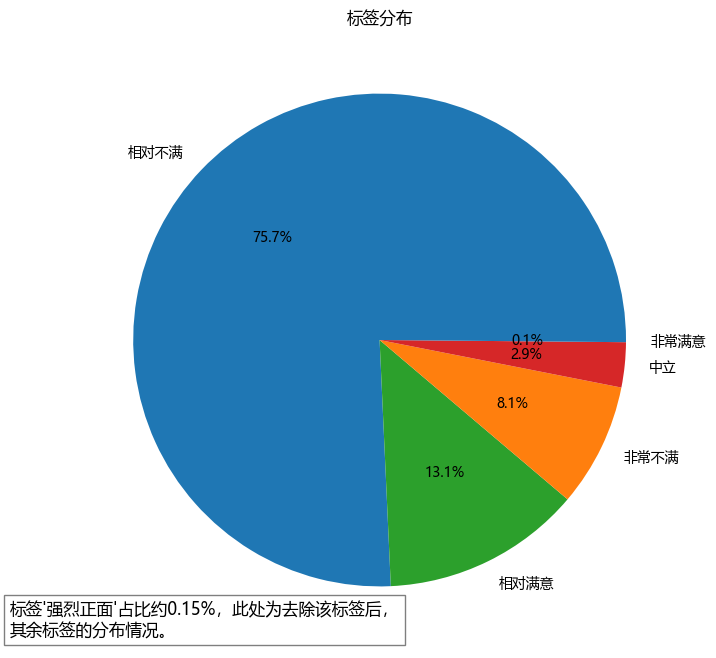

In [84]:



# 设置图形的默认字体（假设你想用系统默认的中文字体）
plt.rcParams['font.family'] = 'Microsoft YaHei'  # Windows系统的默认字体是'Microsoft YaHei'

# 手动定义颜色列表，每个颜色对应一个标签
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # 示例颜色，顺序对应标签A, B, C, D




plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=[str(index[0]) for index in label_counts.index], autopct='%1.1f%%', colors=colors)
text = "标签'强烈正面'占比约0.15%，此处为去除该标签后，\n其余标签的分布情况。"
plt.text(-1.5, -1.2, text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('标签分布')
plt.show()

['相对不满', '相对满意', '非常不满', '中立', '非常满意']
-----------------------------------------------------
['中度负面', '极其负面', '中立', '强烈负面', '中度正面']


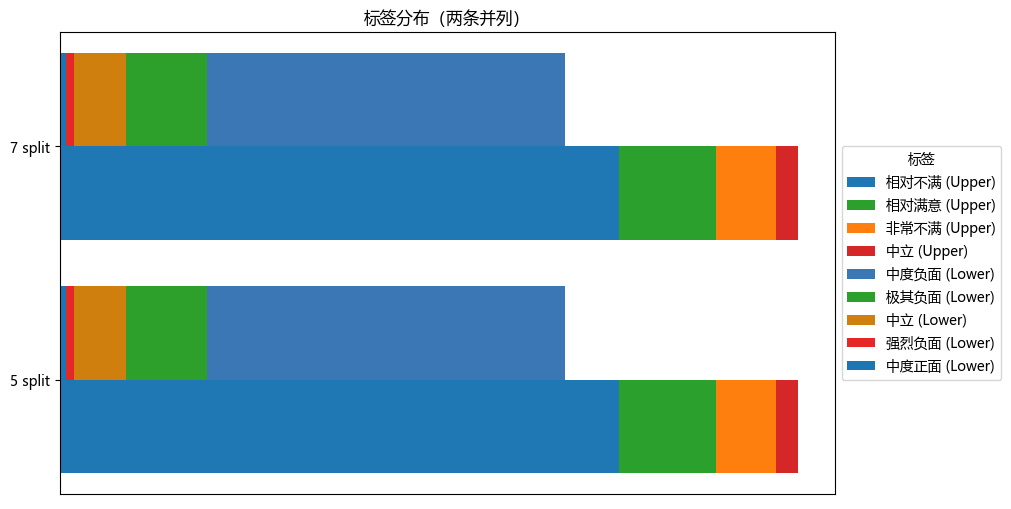

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# 计算每个标签的数量
label_counts2 = data2.value_counts()

# 设置图形的默认字体（假设你想用系统默认的中文字体）
plt.rcParams['font.family'] = 'Microsoft YaHei'  # Windows系统的默认字体是'Microsoft YaHei'

# 手动定义颜色列表，每个颜色对应一个标签
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # 示例颜色，顺序对应标签 A, B, C, D

# 标签及对应数量
labels = [str(index[0]) for index in label_counts.index]  # 所有标签
values = label_counts.values  # 对应数量



print(labels)

# 创建堆叠柱状图
plt.figure(figsize=(10, 6))

# 设置柱子的宽度
bar_width = 0.4  # 设置柱形宽度

# 初始化位置数组，每个标签的x轴位置
x = np.arange(2)  # 每个标签的位置

# 设置并排柱状图的偏移量
offset = np.array([- bar_width /2 , bar_width /2 ])  # 只绘制两组，并列

# 初始化底部位置
bottom = np.zeros(2)

# 绘制第一组堆叠柱状图（左边的那一组）
for i, (label, value, color) in enumerate(zip(labels, values, colors)):
    bars = plt.barh(x + offset[0], value, label=f'{label} (Upper)', color=color, height=bar_width, left=bottom)  # 左边的堆叠柱状图
    bottom += value  # 更新堆叠的底部位置


print('-----------------------------------------------------')


label_counts2 = data2.value_counts()

normalized2 = [x / sum(label_counts2) for x in label_counts2]

label_counts2 = label_counts2[:-2]
labels2 = [str(index[0]) for index in label_counts2.index] 
colors2 = ['#3a77b4', '#2da02c', '#cf7f0e', '#e62728', '#1a77b3','#dc22b2'] 

print(labels2)

# 重置底部位置用于第二组堆叠柱状图
bottom2 = np.zeros(2)

# 绘制第二组堆叠柱状图（右边的那一组）
for i, (label, value, color) in enumerate(zip(labels2, normalized2, colors2)):
    bars = plt.barh(x + offset[1], value, label=f'{label} (Lower)', color=color, height=bar_width, left=bottom2)  # 右边的堆叠柱状图
    bottom += value  # 更新堆叠的底部位置

# 添加标题和标签
plt.title('标签分布（两条并列）')

# 设置x轴的标签
plt.yticks(x, ['5 split','7 split'])  # 设置每个标签的位置
plt.xticks([])
# 显示图例
plt.legend(title="标签", loc='center left', bbox_to_anchor=(1, 0.5))


# 显示图形
plt.show()


In [21]:
data.value_counts()

label
中度负面     19295
极其负面      5608
中立        2518
强烈负面       549
中度正面       222
强烈正面        45
0            3
Name: count, dtype: int64